
# Import libraries and modules


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings


# Setup some basic settings for the notebook


In [2]:
filterwarnings('ignore')
sns.set_theme(context='notebook', style='darkgrid', palette='Paired', font='sans-serif', font_scale=1)
plt.style.use('seaborn-v0_8-darkgrid') # Modern looking grid
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
# 'tab10': 10, 'tab20': 20, 'tab20b': 20, 'tab20c': 20, 'Set1': 9, 'Set2': 8, 'Set3': 12, 'Accent': 8, 'Paired': 12, 'Pastel1': 9, 'Pastel2': 8, 'Dark2': 8, 'tab10', 'tab20', 'tab20b', 'tab20c', 'Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2', 'deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'


# Fetch and load datasets


In [3]:
# training_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/train.csv')
training_data = pd.read_csv('../Data/RossmannStoreSales/train.csv')
training_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# testing_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/test.csv')
testing_data = pd.read_csv('../Data/RossmannStoreSales/test.csv')
testing_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
# store_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/store.csv')
store_data = pd.read_csv('../Data/RossmannStoreSales/store.csv')
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN



# Get the training and testing data ready for pre-processing, joining store column.


In [6]:
training_data = training_data.merge(store_data, how='left', on='Store')
training_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
testing_data = testing_data.merge(store_data, how='left', on='Store')
testing_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN



# Metadata of the training data


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO


## Changing the dtypes of the columns that are actually categorical but have a non-catorgorical type (int64, float64)


In [9]:
training_data['Store'] = training_data['Store'].astype(object)
training_data['Open'] = training_data['Open'].astype(object)
training_data['Promo'] = training_data['Promo'].astype(object)
training_data['Promo2'] = training_data['Promo2'].astype(object)
training_data['SchoolHoliday'] = training_data['SchoolHoliday'].astype(object)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  object 
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  object 
 6   Promo                      1017209 non-null  object 
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  object 
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO


# Metadata of the testing data


In [10]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int


## Changing the dtypes of the testing data columns that are actually categorical but have a non-catorgorical type (int64, float64)


In [11]:
testing_data['Store'] = testing_data['Store'].astype(object)
testing_data['Open'] = testing_data['Open'].astype(object)
testing_data['Promo'] = testing_data['Promo'].astype(object)
testing_data['Promo2'] = testing_data['Promo2'].astype(object)
testing_data['SchoolHoliday'] = testing_data['SchoolHoliday'].astype(object)
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  object 
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  object 
 5   Promo                      41088 non-null  object 
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  object 
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  obj


# Checking Missing/NAN values in both training and testing data.


In [12]:
from typing import List, Tuple
def get_missing_nan_total(*data_list:List[Tuple[pd.DataFrame, str]]) -> pd.DataFrame:
	dat = []
	for data in data_list:
		for df, df_name in data:
			for col in df.columns:
				dat.append({
					'DF Name': df_name,
					'Column Name': col,
					'Missing': df[col].isnull().sum()
				})
	df = pd.DataFrame(dat).set_index('DF Name')
	return df[df['Missing'] > 0]

get_missing_nan_total([
	(training_data, 'Training Data'),
	(testing_data, 'Testing Data')
])

,Column Name,Missing
DF Name,,
Training Data,CompetitionDistance,2642
Training Data,CompetitionOpenSinceMonth,323348
Training Data,CompetitionOpenSinceYear,323348
Training Data,Promo2SinceWeek,508031
Training Data,Promo2SinceYear,508031
Training Data,PromoInterval,508031
Testing Data,Open,11
Testing Data,CompetitionDistance,96
Testing Data,CompetitionOpenSinceMonth,15216



# Separating and displaying the numerical and categorical columns.


In [13]:
numerical_columns = training_data.select_dtypes(np.number).columns.to_list()
categorical_columns = training_data.select_dtypes(object).columns.to_list()

print(f'\033[33mNumerical Columns \033[0m: {numerical_columns}\n'
	f'\033[35mTotal Numerical Columns\033[0m : \033[32m{len(numerical_columns)}\033[0m\n\n'
	f'\033[33mCategorical Columns \033[0m: {categorical_columns}\n'
	f'\033[35mTotal Categorical Columns\033[0m : \033[32m{len(categorical_columns)}\033[0m\n')

print(f'Total Columns / Features / Variables : \033[36m{training_data.shape[1]}\033[0m\n', f'Total Observations / Records / Tuples : \033[36m{training_data.shape[0]}\033[0m', sep='')

Numerical Columns : ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
Total Numerical Columns : 8

Categorical Columns : ['Store', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'PromoInterval']
Total Categorical Columns : 10

Total Columns / Features / Variables : 18
Total Observations / Records / Tuples : 1017209



## Display the categorical unique values and its count.


In [14]:
for col in categorical_columns:
	print(f'\033[36m{col}:\033[0m\n'
		f'  \033[94mTotal Unique\033[0m : \033[32m{training_data[col].nunique()}\033[0m\n'
		f'  \033[94mUnique Items\033[0m : {training_data[col].unique().tolist()}\n')
print('', end='\b\b')

Store:
  Total Unique : 1115
  Unique Items : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 2


## Description of numerical column of training data


In [15]:
training_data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2SinceWeek,509178.0,23.269093,14.095973,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,509178.0,2011.752774,1.662870,2009.0,2011.0,2012.0,2013.0,2015.0



# Description of categorical column of training data


In [16]:
training_data.describe(include=[object]).T

,count,unique,top,freq
Store,1017209,1115,1,942
Date,1017209,942,2015-07-31,1115
Open,1017209,2,1,844392
Promo,1017209,2,0,629129
StateHoliday,1017209,5,0,855087
SchoolHoliday,1017209,2,0,835488
StoreType,1017209,4,a,551627
Assortment,1017209,3,a,537445
Promo2,1017209,2,1,509178
PromoInterval,509178,3,"Jan,Apr,Jul,Oct",293122



# Understanding Individual Column Distributions



## 1. Box Plots (Numerical) - for Outlier Detection


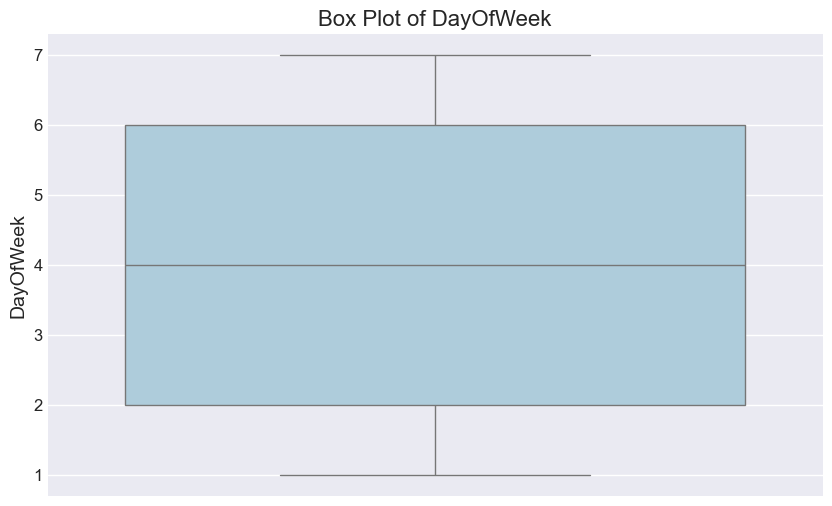

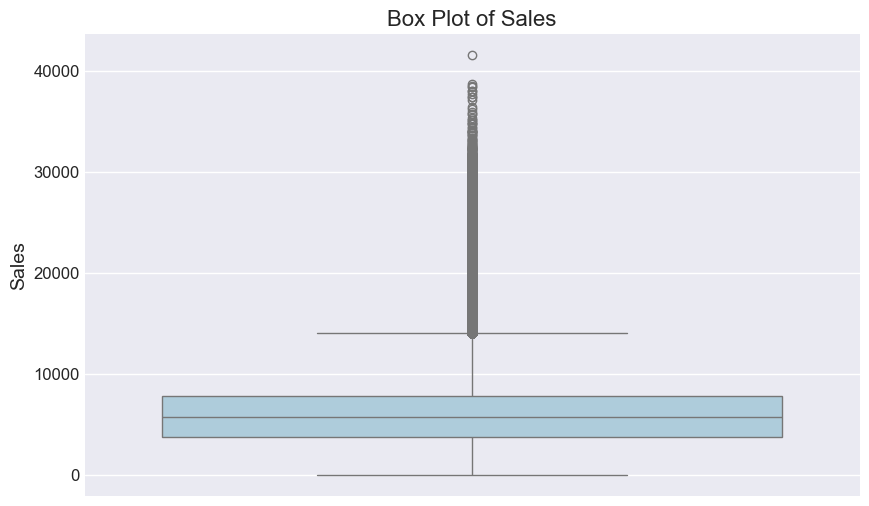

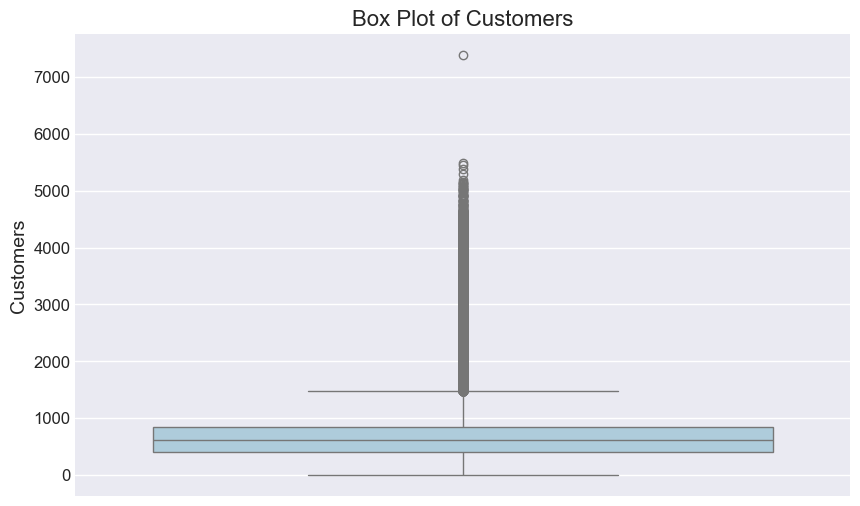

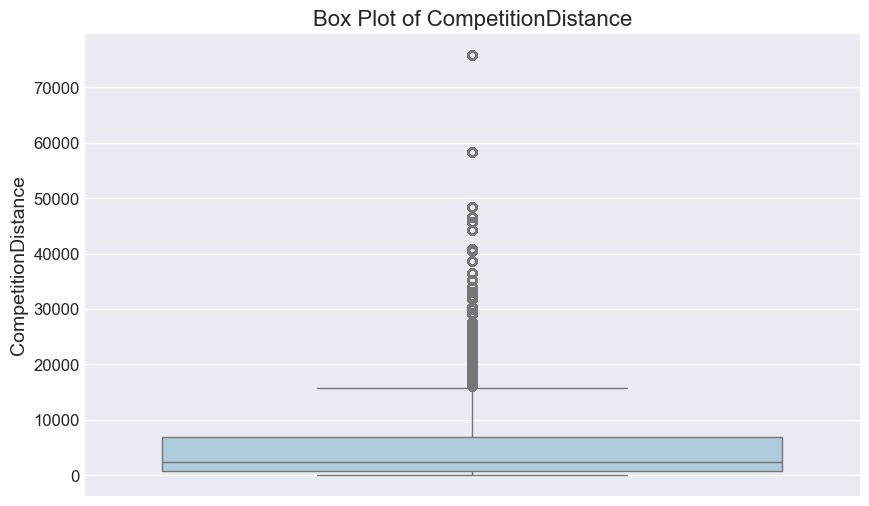

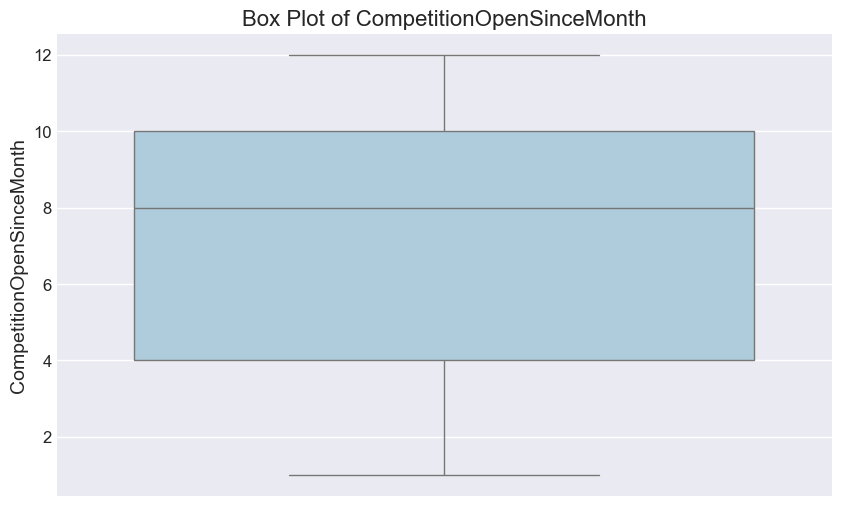

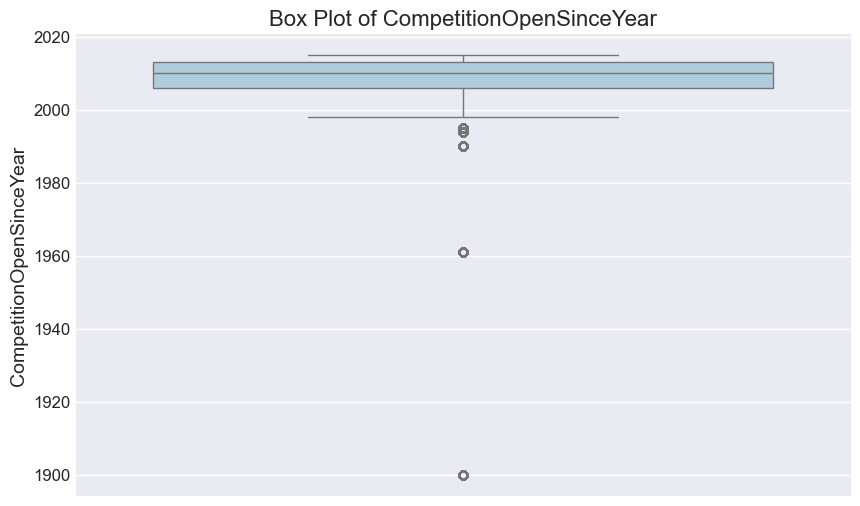

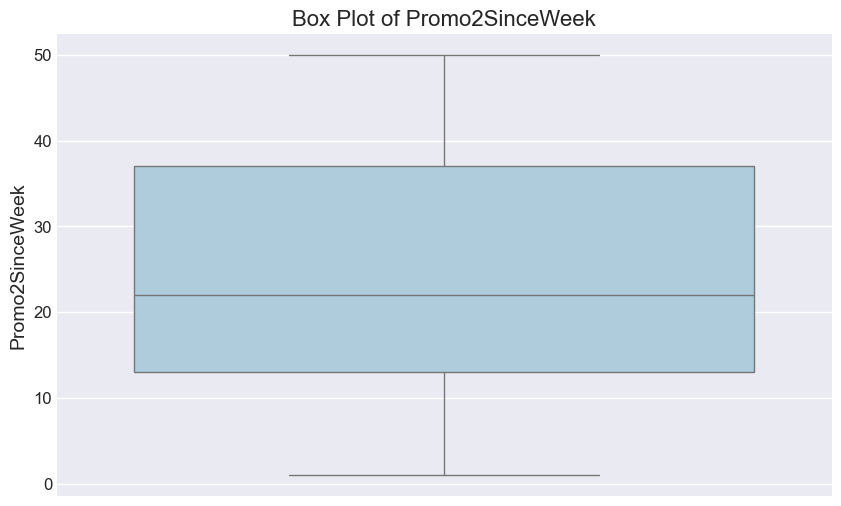

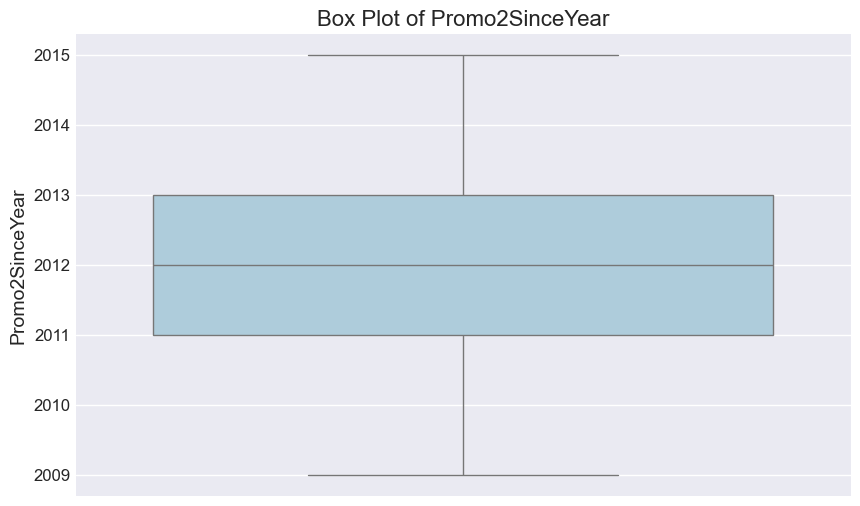

In [17]:
for col in numerical_columns:
    plt.figure()
    sns.boxplot(y=training_data[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


## 2. Count Plots / Bar Charts (Categorical)


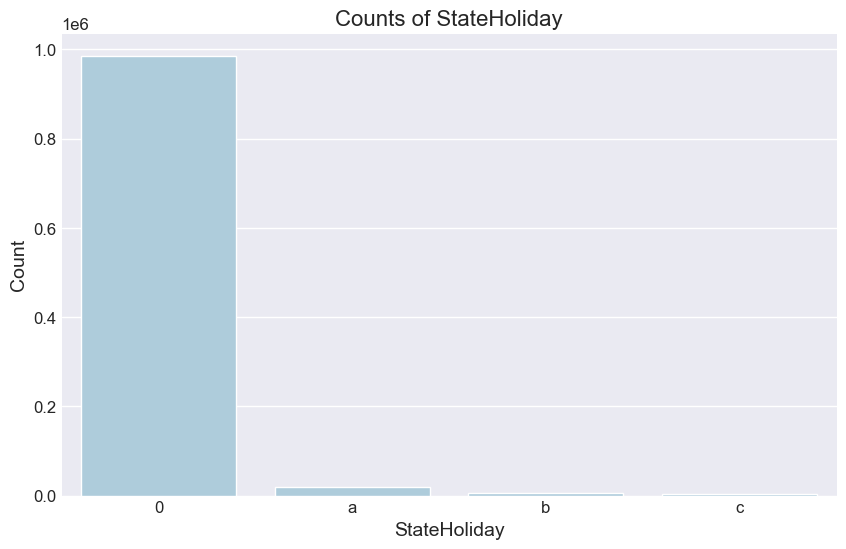

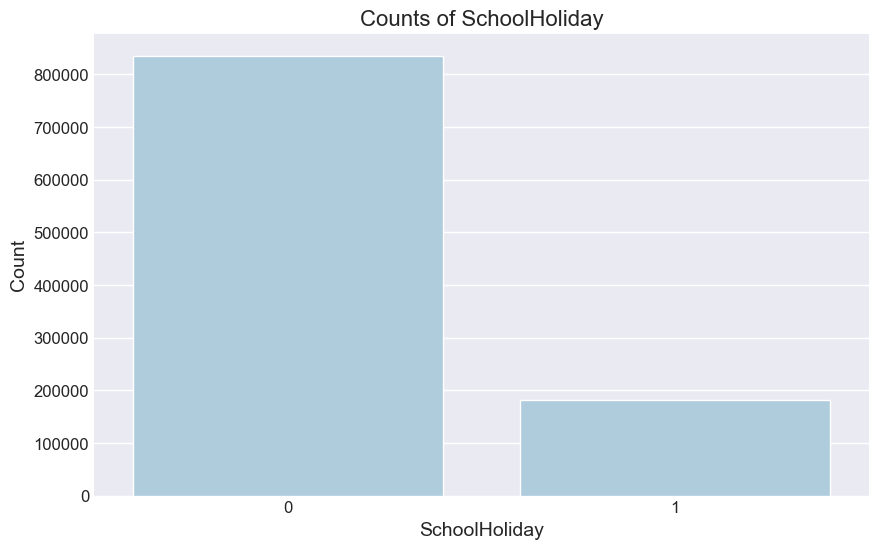

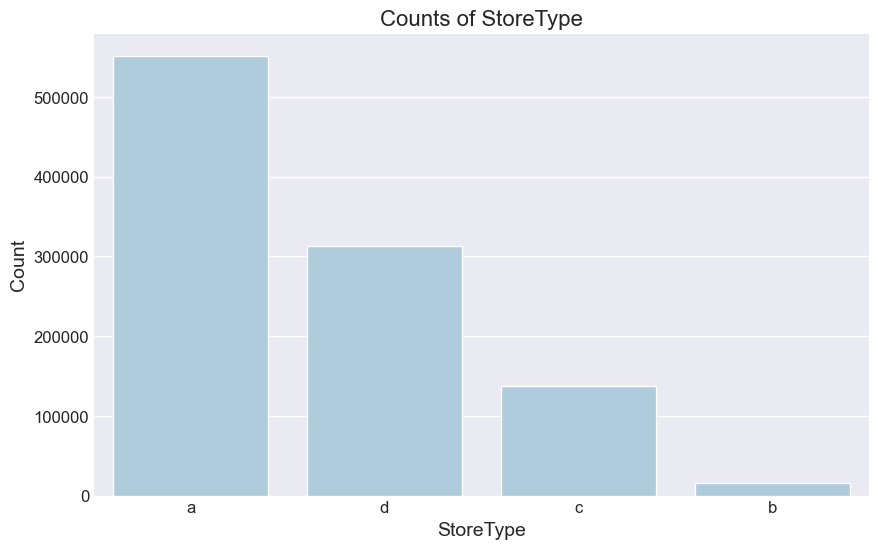

In [18]:
for col in ['StateHoliday', 'SchoolHoliday', 'StoreType']:
    plt.figure()
    sns.countplot(x=training_data[col].astype(str), order=training_data[col].astype(str).value_counts().index)
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## 3. Value counts for PromoInterval (which is a string)


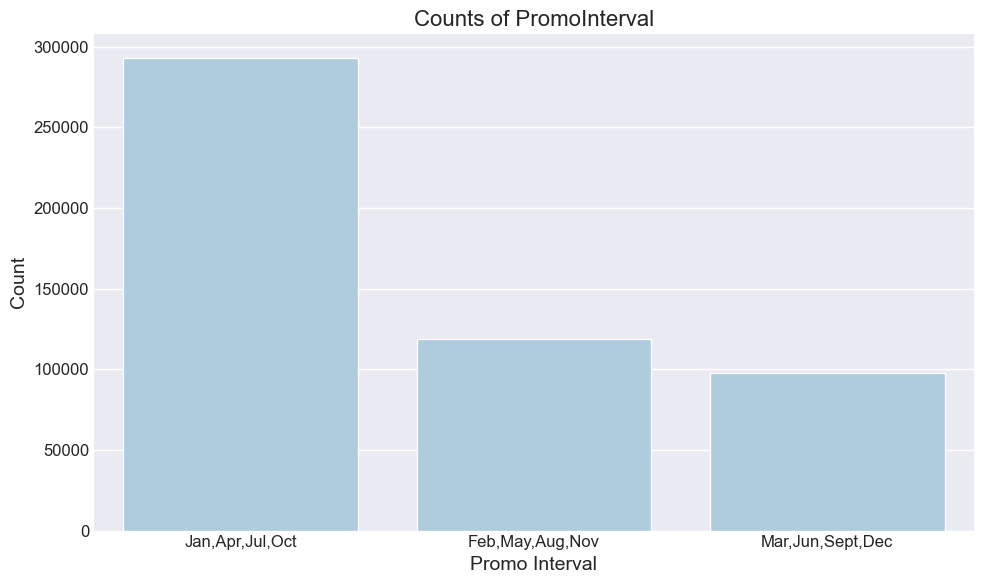

In [19]:
sns.countplot(x=training_data['PromoInterval'], order=training_data['PromoInterval'].value_counts().index)
plt.title('Counts of PromoInterval')
plt.xlabel('Promo Interval')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Exploring Relationships Between Two Variables



## 1. Scatter Plots (Numerical vs. Numerical)


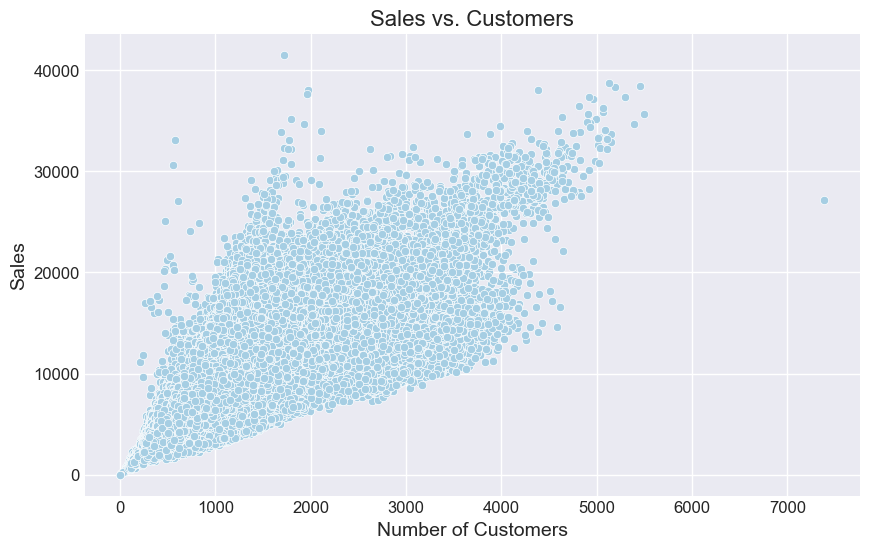

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=training_data)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


## 2. Correlation Heatmap


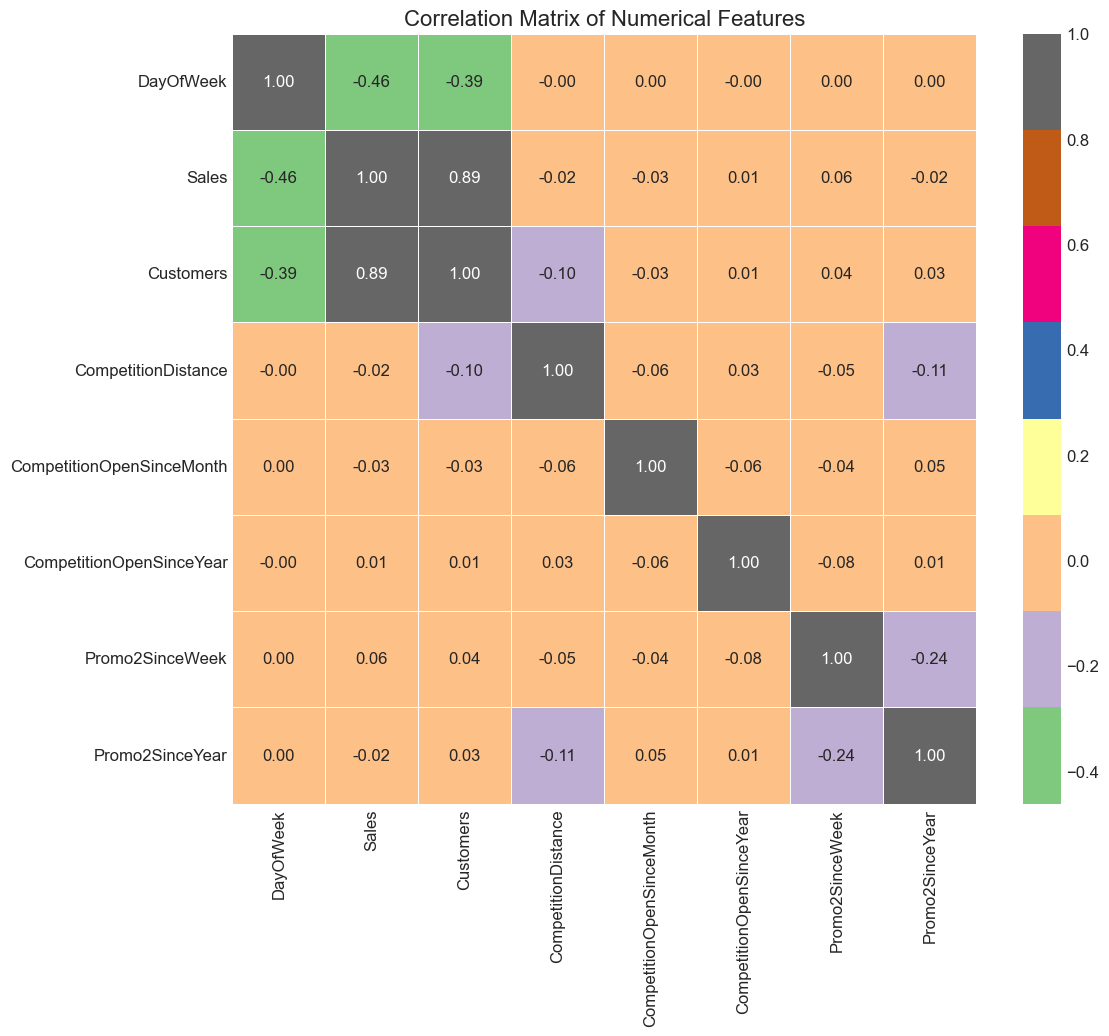

In [21]:
plt.figure(figsize=(12, 10))
corr_matrix = training_data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Accent', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Time-Series Specific Visualizations (Crucial for Sales Data)



### Pre-processing for time-series plots: Aggregate daily sales


In [22]:
copy_training_data = training_data.copy()
copy_training_data = copy_training_data[copy_training_data['Sales'] > 0]

copy_training_data['Date'] = pd.to_datetime(copy_training_data['Date'])
copy_training_data['Month'] = copy_training_data['Date'].dt.month
copy_training_data['Year'] = copy_training_data['Date'].dt.year
copy_training_data['date'] = copy_training_data['Date'].dt.day
copy_training_data['DayOfWeekName'] = copy_training_data['Date'].dt.day_name()
copy_training_data['MonthName'] = copy_training_data['Date'].dt.month_name()

sales_by_year = copy_training_data.groupby(copy_training_data['Year'])['Sales'].sum().reset_index()
sales_by_year.columns = ['Year', 'Sales']

sales_by_month = copy_training_data.groupby([copy_training_data['Year'], copy_training_data['Month']])['Sales'].sum().reset_index()
sales_by_month.columns = ['Year', 'Month', 'Sales']

sales_by_week = copy_training_data.groupby([copy_training_data['Year'], copy_training_data['Date'].dt.isocalendar().week])['Sales'].sum().reset_index()
sales_by_week.columns = ['Year', 'Week', 'Sales']


## 1. Line Plot: Total Daily Sales Over Time


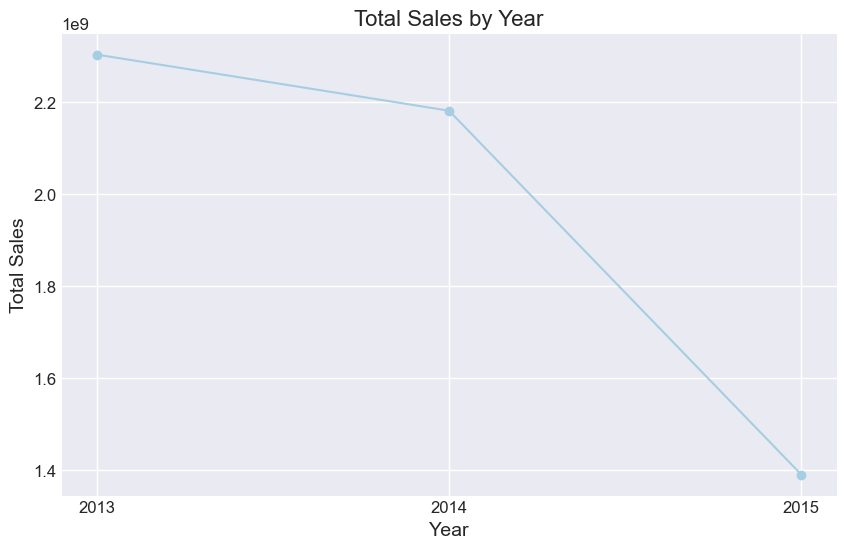

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


In [23]:
plt.plot(sales_by_year['Year'].astype(str), sales_by_year['Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
sales_by_year

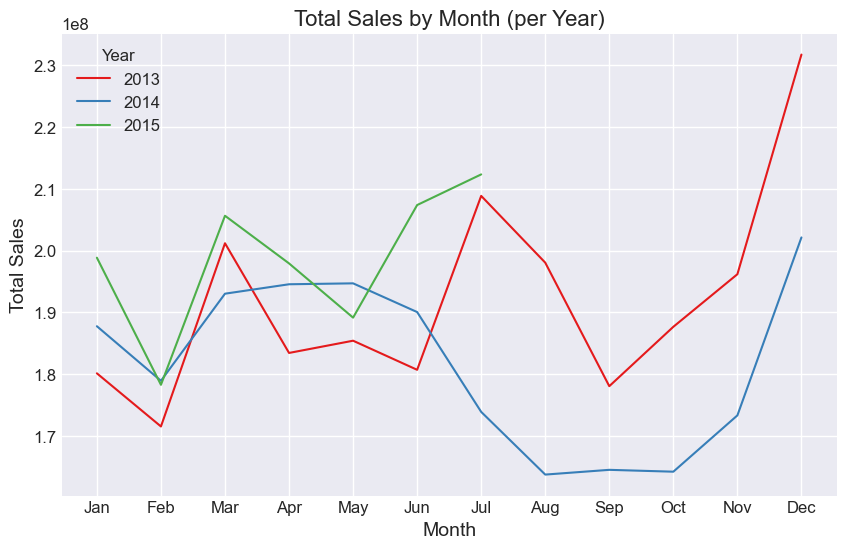

,Year,Month,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


In [24]:
sns.lineplot(data=sales_by_month, x='Month', y='Sales', hue='Year', palette='Set1')
plt.title('Total Sales by Month (per Year)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()
sales_by_month

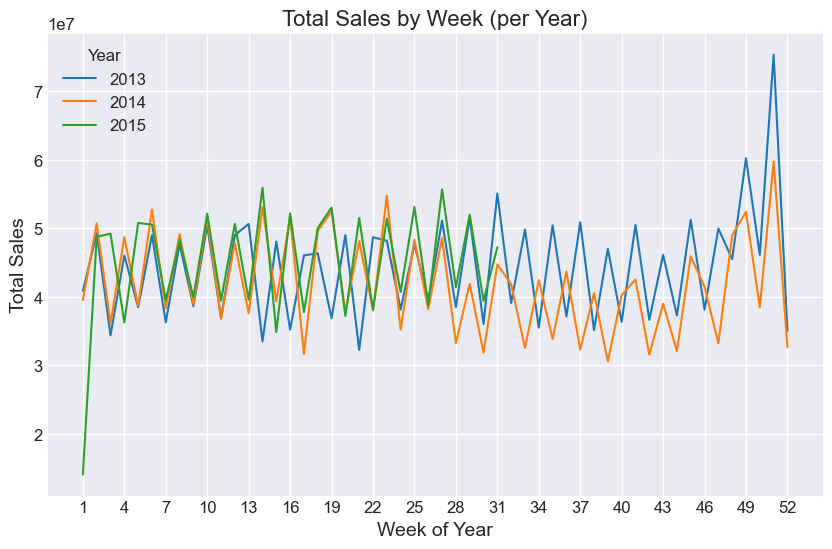

,Year,Week,Sales
0,2013,1,40856334
1,2013,2,49275222
2,2013,3,34377765
3,2013,4,46040169
4,2013,5,38466029
...,...,...,...
130,2015,27,55690481
131,2015,28,41391282
132,2015,29,52008419
133,2015,30,39402115


In [25]:
sns.lineplot(data=sales_by_week, x='Week', y='Sales', hue='Year', palette='tab10')
plt.title('Total Sales by Week (per Year)')
plt.xlabel('Week of Year')
plt.ylabel('Total Sales')
plt.xticks(range(1, 53, 3))
plt.grid(True)
plt.show()
sales_by_week


## 2. Seasonal / Subseries Plots


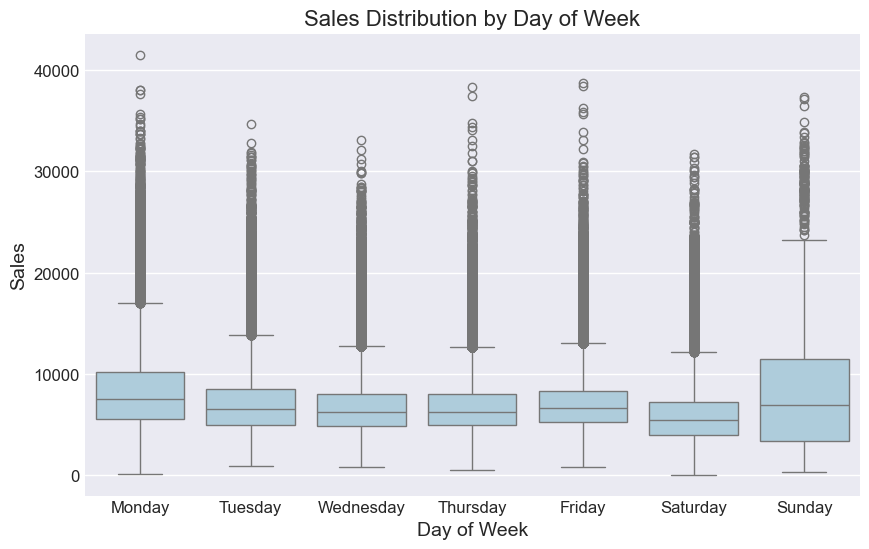

In [26]:
sns.boxplot(x='DayOfWeekName', y='Sales', data=copy_training_data.sort_values('DayOfWeek'), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

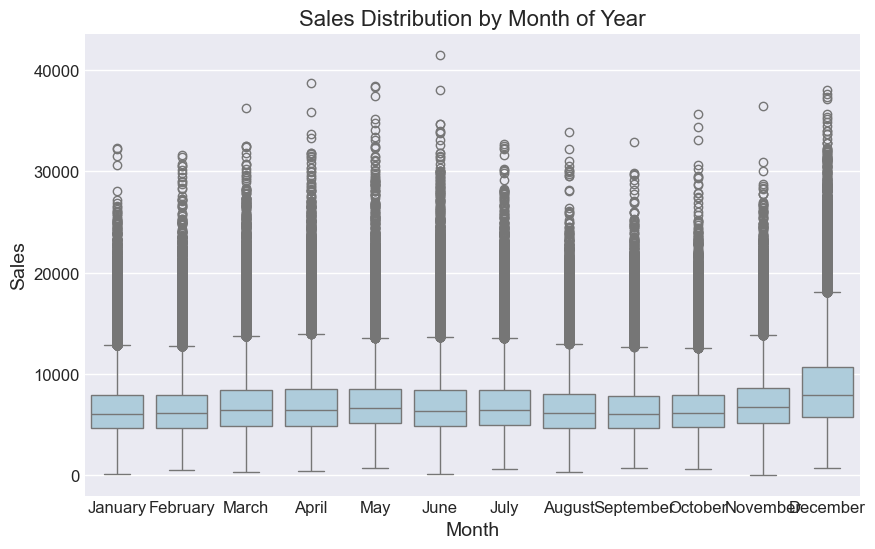

In [27]:
sns.boxplot(x='MonthName', y='Sales', data=copy_training_data.sort_values('Month'))
plt.title('Sales Distribution by Month of Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

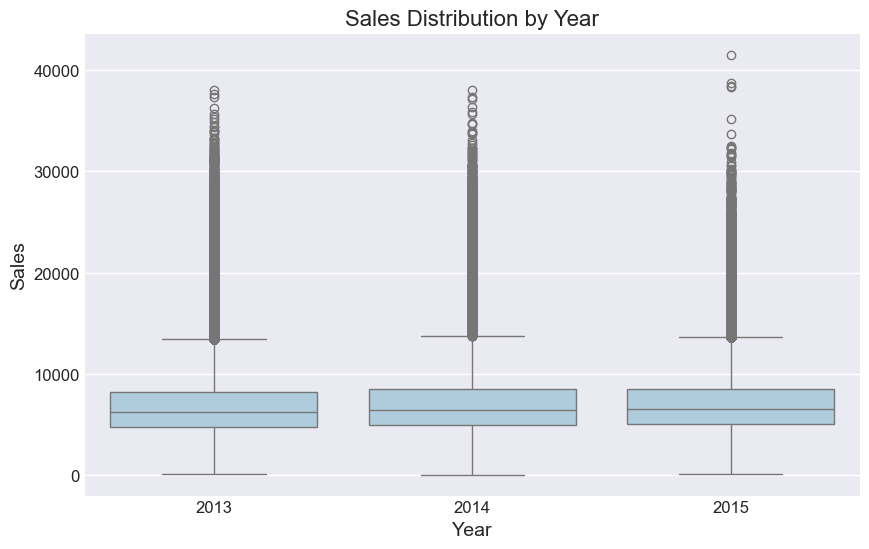

In [28]:
sns.boxplot(x='Year', y='Sales', data=copy_training_data)
plt.title('Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


# Multi-Variate Visualizations



## 1. Sales vs. Customers by Promotion Status


In [29]:
g_holiday = sns.FacetGrid(data=copy_training_data, col='Promo_Status', col_wrap=2, height=5, aspect=1.2, sharey=True)
g_holiday.map_dataframe(sns.scatterplot, x='Customers', y='Sales', alpha=0.8, hue='StateHoliday')
g_holiday.add_legend(title='State Holiday')
g_holiday.set_titles("Promo: {col_name}")
plt.suptitle('Sales vs. Customers by Promotion Status (Colored by State Holiday)', y=1.02)
plt.show()

KeyError: 'Promo_Status'

# Specific Domain-Driven Visualizations

## 1. Sales/Customers during Holidays

In [ ]:
sns.barplot(x='StateHoliday', y='Sales', hue='SchoolHoliday', data=copy_training_data.astype({'StateHoliday': str, 'SchoolHoliday':str}))
plt.title('Average Sales by State and School Holiday Status')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.legend(title='School Holiday')
plt.show()

## 2. Promo2 Impact on Sales

In [ ]:
sns.boxplot(x='Promo2', y='Sales', data=copy_training_data)
plt.title('Sales Distribution for Promo2 Active vs. Not Active')
plt.xlabel('Promo2 (0: Not Active, 1: Active)')
plt.ylabel('Sales')
plt.show()

## 3. Sales over time per Store Type

In [ ]:
agg_storetype_sales = copy_training_data.groupby(['DayOfWeekName', 'StoreType'])['Sales'].sum().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='DayOfWeekName', y='Sales', hue='StoreType', data=agg_storetype_sales, palette='tab10')
plt.title('Total Daily Sales Over Time by Store Type')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Store Type')
plt.show()

## 4. Average Sales per Store (Top 10 Stores)

In [ ]:
avg_sales_per_store = copy_training_data.groupby('Store')['Sales'].mean().nlargest(10).index
top_stores = copy_training_data[copy_training_data['Store'].isin(avg_sales_per_store) & (copy_training_data['Sales'] > 0)]
plt.figure(figsize=(14, 8))
sns.barplot(x='Store', y='Sales', data=top_stores, estimator=np.mean, order=avg_sales_per_store, palette='tab10')
plt.title('Average Sales for Top 10 Performing Stores')
plt.xlabel('Store ID')
plt.ylabel('Average Sales')
plt.show()

## 5. Sales distribution per DayOfWeek and StoreType

In [ ]:
sns.boxplot(x='DayOfWeekName', y='Sales', hue='StoreType', data=copy_training_data.sort_values('DayOfWeek'), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='tab10')
plt.title('Sales Distribution by Day of Week and Store Type')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.legend(title='Store Type', loc='upper right', bbox_to_anchor=(0.98, 1))
plt.show()


# Testing Ground


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateFeatureExtractor(BaseEstimator, TransformerMixin):
	def __init__(self, date_column='Date', date_format='%Y-%m-%d'):
		self.date_column = date_column
		self.date_format = date_format

	def fit(self, X, y=None):
		return self

	def transform(self, X):
		if not isinstance(X, pd.DataFrame):
			if X.ndim == 1:
				X_transformed = pd.DataFrame(X, columns=[self.date_column])
			else:
				X_transformed = pd.DataFrame(X)
		else:
			X_transformed = X.copy()

		X_transformed[self.date_column] = pd.to_datetime(X_transformed[self.date_column], format=self.date_format)

		X_transformed['Year'] = X_transformed[self.date_column].dt.year
		X_transformed['Month'] = X_transformed[self.date_column].dt.month
		X_transformed['DayOfMonth'] = X_transformed[self.date_column].dt.day
		X_transformed['WeekOfYear'] = X_transformed[self.date_column].dt.isocalendar().week.astype(int)
		X_transformed['Quarter'] = X_transformed[self.date_column].dt.quarter
		X_transformed['IsWeekend'] = (X_transformed[self.date_column].dt.dayofweek >= 5).astype(int)

		X_transformed = X_transformed.drop(columns=[self.date_column], axis=1)

		return X_transformed

dfe = DateFeatureExtractor().fit(training_data).transform(training_data)
training_data = dfe.copy(deep=True)


In [ ]:
# X = training_data.drop(['Sales'], axis=1)
# y = training_data['Sales']